# Example Jupyter Notebook

Here I present an exemple of how to use DustyPY. In this tutorial we will use Betelgeuse as an exemple.

### Set up a Model

The first thing to do is to create your model. In the case of Betelgeuse, we have a single star with a Temperature around 3500 K:


In [1]:
from DustyPY.stars import Star

S = Star(Name='E1',Temperature=3500,Luminosity=1)

Note: For a single star, the Luminosity must always be 1 as it is the contribution of this star to the total luminosity of the model.

Then we need to create the dust around. We refer to this paper for the dust composition and grain size distribution [Cannon et al. 2023](https://ui.adsabs.harvard.edu/abs/2023A&A...675A..46C)

In [2]:
from DustyPY.stars import Dust

Composition = {'Al2O3-comp':0.2,'MgFeSiO4':0.16,'Ca2Al2SiO7':0.64}
DustSize = {'amin' : 0.01, 'amax': 1}  #Size in microns
tau = 1 #Optical depth of the dust shell at 0.55 microns to be fitted

dust = Dust(Composition=Composition, DustSize=DustSize, tau=tau)

With this we can create our model with a distance of 197 pc [Graham et al. 2008](https://iopscience.iop.org/article/10.1088/0004-6256/135/4/1430):

In [3]:
from DustyPY.stars import Model

model = Model(Name='Betelgeuse', NbStar=1, Stars=[S], Dust=dust, distance = 197.0) 

Then we need to create the dusty object and give him the dusty PATH on your machine and the model:

In [4]:
from DustyPY.dusty import Dusty

Path = '/Users/gabriel/Documents/Stage/code/dustyV2/' #Replace with the path to the dusty directory

dusty = Dusty(PATH=Path, Model=model,Lestimation=1.8e5)

### Add the data

Once the dusty file is set with the model, we can import the data. To do this you can either import your own data like follow:

In [13]:
from DustyPY.Data import Data

data = Data()

d = data.ImportData('Path_to_Data') #Replace with the path to the data

data.set_xdata(xdata) #Replace with the x data, Wavelength in microns
data.set_ydata(ydata) #Replace with the y data, Flux in W/m2 or Jy
data.set_yerr(yerr)

FileNotFoundError: [Errno 2] No such file or directory: 'Path_to_Data'

Or you can use the built in querry to reitrive the photometry from Vizier:

In [5]:
from DustyPY.Data import Data
Dat = Data()

table = Dat.QuerryVizierData(radius = 5, target='Betelgeuse')
Dat.SetVizierData(table)

If needed, you can restrict the data to a subset using the method RestrictData():

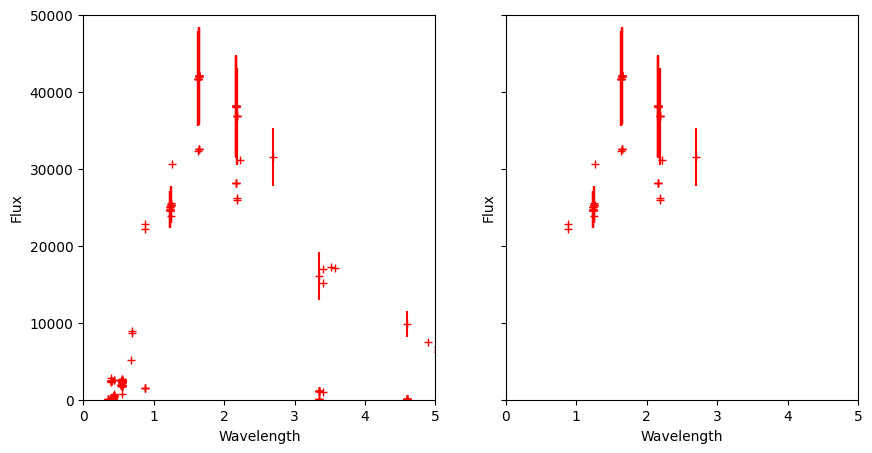

In [6]:
import matplotlib.pyplot as plt

fig,(ax1,ax2) = plt.subplots(1,2, sharey=True,figsize=(10,5))

Dat.ScatterData(xlim=(0,5),ylim=(0,5e4), ax=ax1, kwargs={'fmt':'+', 'color':'r'})
Dat.RestrictData(['ydata > 20000'])
Dat.ScatterData(xlim=(0,5),ylim=(0,5e4), ax=ax2, kwargs={'fmt':'+', 'color':'r'})


You can also unred the data using the Fitzpatrick parameterization ([Fitzpatrick et al. 1999](https://ui.adsabs.harvard.edu/abs/1999PASP..111...63F))

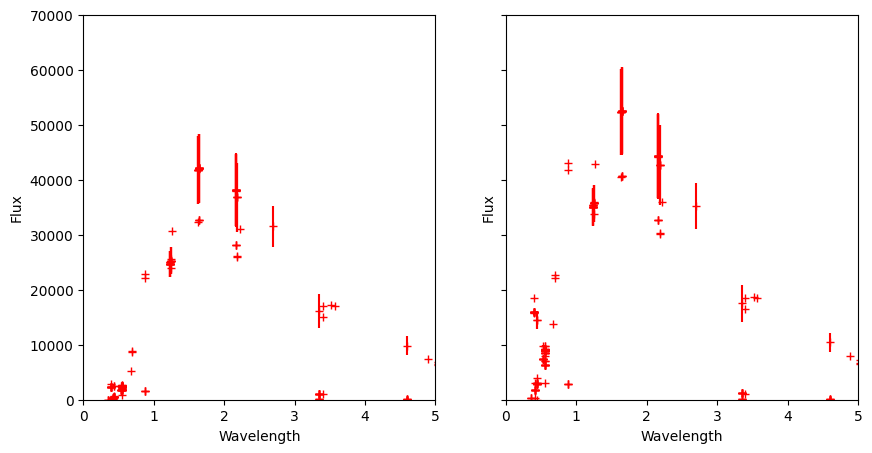

In [7]:
fig,(ax1,ax2) = plt.subplots(1,2, sharey=True,figsize=(10,5))

Dat.SetVizierData(table)
Dat.ScatterData(xlim=(0,5),ylim=(0,7e4), ax=ax1, kwargs={'fmt':'+', 'color':'r'})
Dat.UnredData(EBV=0.470)
Dat.ScatterData(xlim=(0,5),ylim=(0,7e4), ax=ax2, kwargs={'fmt':'+', 'color':'r'})


### Lunch Model

Once the model is setup, you can lunch dusty and extract the results.

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


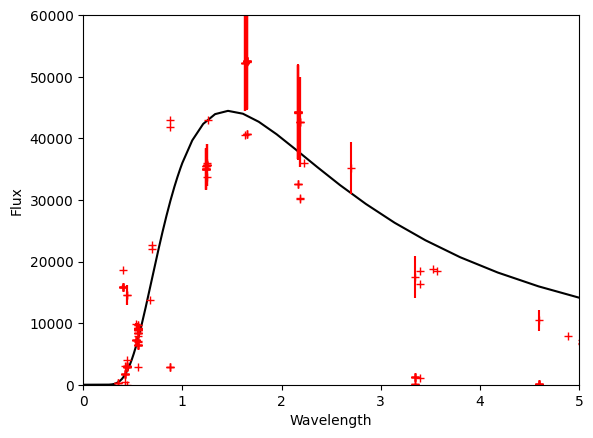

In [8]:
#Change the parameter file and lunch dusty
dusty.ChangeParameter()
dusty.LunchDusty()


#Retrieve the results SED and plot it
dusty.MakeSED(distance=dusty.get_Model().get_Distance())

fig,ax = plt.subplots()
dusty.PlotSED(xlim=(0,5),ylim=(0,6e4), ax=ax, kwargs={'color':'k'})
Dat.ScatterData(xlim=(0,5),ylim=(0,6e4), ax=ax, kwargs={'fmt':'+', 'color':'r'})

### Fit Model

Finaly, DustyPY offer a convenient way to fit a model to the data using the librarie [pymcmcstat](https://github.com/prmiles/pymcmcstat.git).

In [9]:
#Querry the data
table = Dat.QuerryVizierData(radius = 5, target='Betelgeuse')
Dat.SetVizierData(table)

#To fit data the error must be different from 0 so we restrict the data
Dat.RestrictData(['yerr != 0.'])

In [11]:
print(Dat.get_yerr())

[3.00e+01 2.00e+00 5.00e+01 3.00e+01 2.00e+00 3.00e+01 3.00e+00 6.50e+03
 6.30e+03 2.40e+03 9.00e+00 9.00e+00 9.00e+00 5.00e+01 6.60e+03 6.30e+03
 2.40e+03 6.70e+03 6.20e+03 2.30e+03 2.76e-01 3.00e+01 3.00e+00 2.00e+00
 2.00e+01 6.60e+03 6.30e+03 2.40e+03 1.92e+01 2.10e+01 7.00e+01 1.90e+02
 3.80e+03 6.30e+03 6.20e+03 2.40e+03 1.00e+00 1.00e+00 2.00e+00 2.00e+01
 6.60e+03 6.30e+03 2.40e+03 1.00e+00 2.00e+01 6.30e+03 6.20e+03 2.40e+03
 4.00e+01 3.00e+00 1.68e+03 3.10e+03 2.00e+00 2.00e+01 6.60e+03 6.30e+03
 2.40e+03 2.00e+00 2.00e+01 6.60e+03 6.20e+03 2.40e+03 6.00e+01 2.80e+02
 2.00e+00 2.00e+01 6.60e+03 6.20e+03 2.40e+03 6.00e+01 2.80e+02 6.30e+03
 6.20e+03 2.40e+03 5.00e+01 8.00e+00 3.00e-02 1.00e-02 4.00e-02 1.00e-02
 1.00e-02 1.00e-02 1.00e-02 1.00e-02 1.00e-02 1.00e-02 6.60e+03 6.30e+03
 2.30e+03 5.00e+01 1.00e+00 1.00e-01 4.00e-01 4.00e-01 3.00e+01 3.00e+00]


In [12]:
from DustyPY.DustyFit import DustyFit

#Initialize the DustyFit object
fit = DustyFit(dusty, Data=Dat)

#Initialize the Parameter to Fit
#For the Temperature/Luminosity of the stars, always put the number of the star, 
# in the same order as the listed stars, after Temp ex: Temp1, Lum1, Temp2, Lum2,...)
Param = {'Temp1':{'theta0':3500,'minimum':2000,'maximum':4000}, 
         'Opacity':{'theta0':1,'minimum':0.1,'maximum':4},
         'Lest':{'theta0':1,'minimum':0,'maximum':10}, #Mandatory, fit the Lestimation (Luminosity = Lest*Lestimation)
    }

#Initialize the parameter of the MCMC
ParamFit = {
                        'nsimu': 100,         #Number of iteration (larger is better but slow due to the dusty runtime)   
                        'updatesigma': True,  #Update the sigma of the likelihood function
                        'method': 'dram',     #Sampling method
                        'adaptint': 100,      #Number of interates between adaptation.
                        'verbosity': 0,       #0=No output, 1=Output
                        'waitbar': True,      #Display a waitbar
                    }

#Set the parameters
fit.set_Param(Param)
fit.set_ParamFit(ParamFit)

#Run the MCMC and get results
fit.LunchFit()
fit.get_Fit().PrintResults()

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


 [-                 4%                  ] 4 of 100 complete in 2.0 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


 [-                 5%                  ] 5 of 100 complete in 3.9 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


 [--                6%                  ] 6 of 100 complete in 5.9 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


 [--                7%                  ] 7 of 100 complete in 9.9 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


 [---               8%                  ] 8 of 100 complete in 13.8 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


 [---               9%                  ] 9 of 100 complete in 17.8 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


 [---              10%                  ] 10 of 100 complete in 22.0 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


 [----             11%                  ] 11 of 100 complete in 24.0 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


 [----             12%                  ] 12 of 100 complete in 27.9 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


 [----             13%                  ] 13 of 100 complete in 31.8 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


 [-----            14%                  ] 14 of 100 complete in 35.8 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


 [-----            15%                  ] 15 of 100 complete in 39.8 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


 [------           16%                  ] 16 of 100 complete in 41.9 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


 [------           17%                  ] 17 of 100 complete in 43.8 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


 [------           18%                  ] 18 of 100 complete in 46.0 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


 [-------          19%                  ] 19 of 100 complete in 48.0 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


 [-------          20%                  ] 20 of 100 complete in 52.0 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


 [-------          21%                  ] 21 of 100 complete in 54.0 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


 [--------         22%                  ] 22 of 100 complete in 56.0 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


 [--------         23%                  ] 23 of 100 complete in 58.0 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


 [---------        24%                  ] 24 of 100 complete in 59.9 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


 [---------        25%                  ] 25 of 100 complete in 63.9 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


 [---------        26%                  ] 26 of 100 complete in 65.9 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


 [----------       27%                  ] 27 of 100 complete in 67.8 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


 [----------       28%                  ] 28 of 100 complete in 71.8 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


 [-----------      29%                  ] 29 of 100 complete in 73.7 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


 [-----------      30%                  ] 30 of 100 complete in 75.7 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


 [-----------      31%                  ] 31 of 100 complete in 79.7 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


 [------------     32%                  ] 32 of 100 complete in 81.6 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


 [------------     33%                  ] 33 of 100 complete in 83.6 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


 [------------     34%                  ] 34 of 100 complete in 85.6 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


 [-------------    35%                  ] 35 of 100 complete in 87.6 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


 [-------------    36%                  ] 36 of 100 complete in 89.9 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


 [--------------   37%                  ] 37 of 100 complete in 95.3 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


 [--------------   38%                  ] 38 of 100 complete in 99.3 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


 [--------------   39%                  ] 39 of 100 complete in 101.3 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


 [---------------  40%                  ] 40 of 100 complete in 105.3 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


 [---------------  41%                  ] 41 of 100 complete in 109.2 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


 [---------------  42%                  ] 42 of 100 complete in 111.1 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


 [---------------- 43%                  ] 43 of 100 complete in 113.1 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


 [---------------- 44%                  ] 44 of 100 complete in 117.1 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


 [-----------------45%                  ] 45 of 100 complete in 121.2 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


 [-----------------46%                  ] 46 of 100 complete in 123.3 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


 [-----------------47%                  ] 47 of 100 complete in 127.2 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


 [-----------------48%                  ] 48 of 100 complete in 129.2 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


 [-----------------49%                  ] 49 of 100 complete in 133.1 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


 [-----------------50%                  ] 50 of 100 complete in 137.1 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


 [-----------------51%                  ] 51 of 100 complete in 141.0 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


 [-----------------52%                  ] 52 of 100 complete in 145.0 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


 [-----------------53%                  ] 53 of 100 complete in 146.9 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


 [-----------------54%                  ] 54 of 100 complete in 150.9 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


 [-----------------55%                  ] 55 of 100 complete in 152.8 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


 [-----------------56%-                 ] 56 of 100 complete in 154.8 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


 [-----------------57%-                 ] 57 of 100 complete in 156.8 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


 [-----------------58%--                ] 58 of 100 complete in 158.8 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


 [-----------------59%--                ] 59 of 100 complete in 160.7 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


 [-----------------60%--                ] 60 of 100 complete in 164.7 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


 [-----------------61%---               ] 61 of 100 complete in 166.6 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


 [-----------------62%---               ] 62 of 100 complete in 170.6 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


 [-----------------63%---               ] 63 of 100 complete in 174.5 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


 [-----------------64%----              ] 64 of 100 complete in 176.5 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


 [-----------------65%----              ] 65 of 100 complete in 178.5 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


 [-----------------66%-----             ] 66 of 100 complete in 182.4 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


 [-----------------67%-----             ] 67 of 100 complete in 184.4 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


 [-----------------68%-----             ] 68 of 100 complete in 186.3 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


 [-----------------69%------            ] 69 of 100 complete in 190.3 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


 [-----------------70%------            ] 70 of 100 complete in 194.2 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


 [-----------------71%------            ] 71 of 100 complete in 196.2 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


 [-----------------72%-------           ] 72 of 100 complete in 200.1 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


 [-----------------74%--------          ] 74 of 100 complete in 202.1 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


 [-----------------75%--------          ] 75 of 100 complete in 204.1 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


 [-----------------76%--------          ] 76 of 100 complete in 208.0 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


 [-----------------77%---------         ] 77 of 100 complete in 210.0 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


 [-----------------78%---------         ] 78 of 100 complete in 212.0 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


 [-----------------79%----------        ] 79 of 100 complete in 213.9 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


 [-----------------80%----------        ] 80 of 100 complete in 215.9 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


 [-----------------81%----------        ] 81 of 100 complete in 217.9 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


 [-----------------85%------------      ] 85 of 100 complete in 219.8 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


 [-----------------86%------------      ] 86 of 100 complete in 221.8 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


 [-----------------87%-------------     ] 87 of 100 complete in 223.8 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


 [-----------------88%-------------     ] 88 of 100 complete in 227.7 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


 [-----------------89%-------------     ] 89 of 100 complete in 229.7 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


 [-----------------90%--------------    ] 90 of 100 complete in 231.7 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


 [-----------------91%--------------    ] 91 of 100 complete in 235.7 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


 [-----------------92%--------------    ] 92 of 100 complete in 237.6 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


 [-----------------93%---------------   ] 93 of 100 complete in 239.7 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


 [-----------------94%---------------   ] 94 of 100 complete in 241.6 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


 [-----------------95%----------------  ] 95 of 100 complete in 245.6 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


 [-----------------96%----------------  ] 96 of 100 complete in 247.6 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


 [-----------------97%----------------  ] 97 of 100 complete in 251.6 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


 [-----------------98%----------------- ] 98 of 100 complete in 253.5 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


 [-----------------99%----------------- ] 99 of 100 complete in 255.6 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


 [-----------------100%-----------------] 100 of 100 complete in 259.5 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


 [-----------------101%-----------------] 101 of 100 complete in 261.6 sec

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG




------------------------------
      name:      mean       std    MC_err       tau    geweke
     Temp1:   3837.08    149.53     58.35      5.83      0.93
   Opacity:      0.21      0.09      0.03      2.19      0.28
      Lest:      0.79      0.03  9.56e-03      4.42      0.94
------------------------------
Acceptance rate information
---------------
Results dictionary:
Stage 1: 48.00%
Stage 2: 40.00%
Net    : 88.00% -> 88/100
---------------
Chain provided:
Net    : 84.00% -> 42/50
---------------
Note, the net acceptance rate from the results dictionary
may be different if you only provided a subset of the chain,
e.g., removed the first part for burnin-in.
------------------------------


Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


{'Temp1': 3714.195070275745, 'Opacity': 0.10226909952161714, 'Lest': 0.787056538559831}


Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG


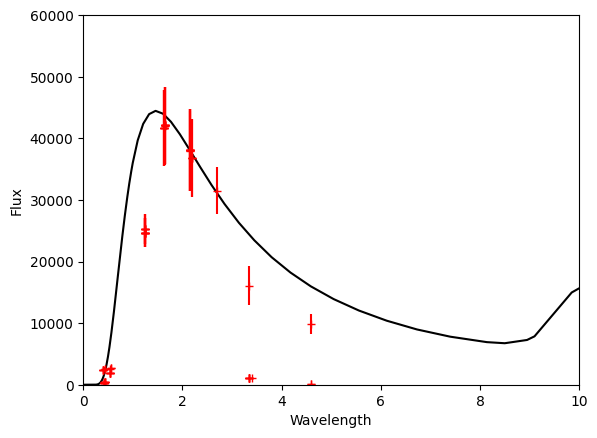

In [14]:
fig,ax = plt.subplots()

fit.PlotResults(xlim=(0,10),ylim=(0,6e4), ax=ax, kwargs_fit={'color':'k'}, kwargs_data={'fmt':'+', 'color':'r'})